In [1]:
#!/usr/bin/python2.7

# author: Hayden Fuss, Jeremy McKenzie

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import time

time_fmt = "%m/%d/%Y"

fields = []

pub = []
pubd = []
priv = []
other = []

def publicReport(report): # sorts for latents in public
    return '1' in report['Public'] or '1' in report['Trash'] or '1' in report['Graffiti'] or '1' in report['PublicDenig']

def pubdReport(report): #sorts for specifically 'PublicDenig' latents
    return '1' in report['PublicDenig']  or '1' in report['Trash'] or '1' in report['Graffiti']
    
def privateReport(report):
    return '1' in report['Housing'] or '1' in report['PrivateNeglect'] or '1' in report['UncivilUse'] or '1' in report['BigBuild']

count = 0

with open('CRM_2012_2013_no_ids.csv') as csvfile:
    reports = csv.DictReader(csvfile)
    fields = reports.fieldnames
    for r in reports:
        date = time.strptime(r['OPEN_DT'], time_fmt) # converts string version of date into a date object
        count += 1
        if publicReport(r):
            pub.append(r)
            if pubdReport(r):
                pubd.append(r)
        elif privateReport(r):
            priv.append(r)
        else:
            other.append(r)
            
with open('311_public_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in pub:
        writer.writerow(f)
        
with open('311_private_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in priv:
        writer.writerow(f)

with open('311_other_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in other:
        writer.writerow(f)
        
with open('311_pubd_2012_2013.csv', 'wb') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fields)

    writer.writeheader()
    for f in pubd:
        writer.writerow(f)

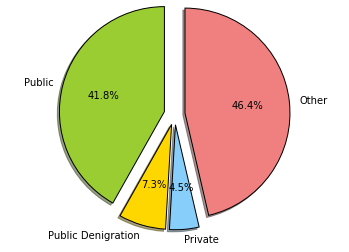

In [2]:
#source: http://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

if count != (len(pub) + len(priv) + len(other)):
    print "uh oh"

labs = ['Public', 'Public Denigration', 'Private', 'Other']
sizes = [len(pub)-len(pubd), len(pubd), len(priv), len(other)]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labs, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('percentages_311.png', dpi=100)
plt.show()